In [1]:
# standard preamble. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 


In [2]:
# !pip install ipympl

In [3]:
# %matplotlib ipympl

In [4]:
def my_table(df,lab1,lab2):
    tbl = df.groupby([lab1, lab2]).size()
    tbl = tbl.unstack() 
    return tbl 

In [5]:
def plot_motor_data():
    """
        plots motor policy data with super grey. does not save fig. 
    """

    df = pd.read_csv("french_motor.csv").iloc[:,1:]
    
    sns.scatterplot(x=df.dens, 
                    y=df.y_log, 
                    color="grey",
                    alpha = 0.70, 
                    s=5.0)

In [6]:
def load_french_motor():
  df = pd.read_csv("french_motor.csv")
  df = df.iloc[:,1:]
  return df

In [7]:
def plot_motor_grey(df):
  color = "grey"
  sns.scatterplot(x=df["dens"], y=df["y_log"], color=color, s=5.0)

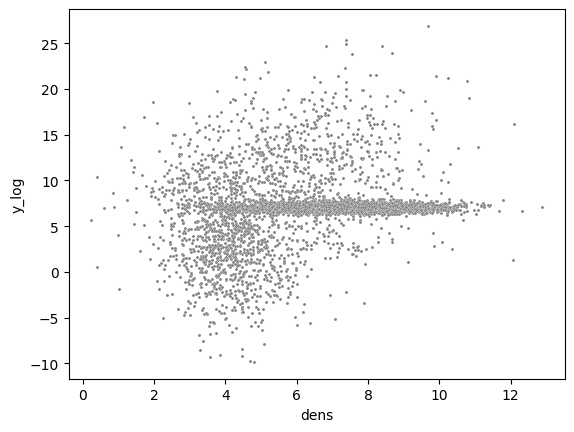

In [8]:
### Log Severity vs Living Density
### Severity depends on how expensive the car you are driving is
df = load_french_motor()
plot_motor_grey(df)

In [28]:
# Numpy matrices
x = df[["dens"]]
y = df["y_log"]

In [29]:
lm = LinearRegression()
model = lm.fit(x, y)
y_hat = lm.predict(x)

<AxesSubplot: xlabel='dens', ylabel='y_log'>

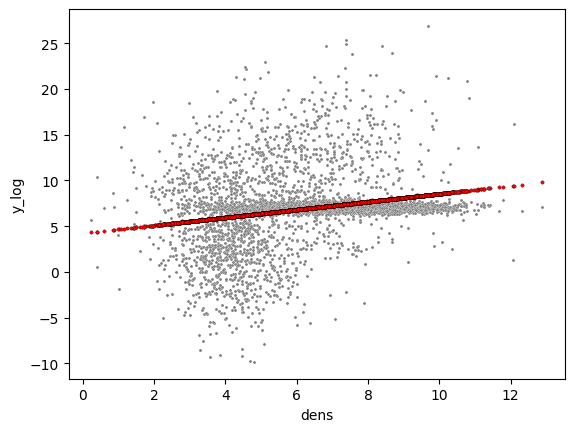

In [35]:
color = "grey"
sns.scatterplot(x=df["dens"], y=df["y_log"], color=color, s=5.0)
df["y_hat"] = y_hat
sns.scatterplot(x=df["dens"], y=y_hat, color="red", s=6.0, edgecolor="black")

In [37]:
logr = LogisticRegression()
labs = df["labs"]
logr.fit(x, labs)
z = logr.predict_proba(x)
lab_hat = logr.predict(x)

In [38]:
weights_1 = z[:,0]
weights_2 = z[:,1]
weights_3 = z[:,2]


In [39]:
lm1 = LinearRegression()
lm1.fit(x, y, sample_weight=weights_1)

LinearRegression()

In [40]:
lm2 = LinearRegression()
lm2.fit(x, y, sample_weight=weights_2)

LinearRegression()

In [41]:
lm3 = LinearRegression()
lm3.fit(x, y, sample_weight=weights_3)

LinearRegression()

In [50]:
# entry point for the program. 
if __name__ == "__main__":
    print("Running ")


    plot_motor_data()
    plt.savefig("french_motor_grey.png") 
    plt.clf() 

    cpat = sns.color_palette('pastel',3)
    df = pd.read_csv("french_motor.csv").iloc[:,1:]
    df['colors'] = df.labs.apply(lambda x: cpat[x-1])
    
    sns.scatterplot(x=df.dens, 
                    y=df.y_log, 
                    color=df['colors'],
                    edgecolor = 'black',
                    s=5.0)
    plt.savefig('french_motor.png')
    plt.clf()

    
    # set up X and y 
    X = df[['dens']].to_numpy() 
    y = df['labs'].to_numpy() 

    # logistic regression model. 
    lr_model = LogisticRegression(random_state=0).fit(X, y)

    # get some weights and assignments 
    hard_class = lr_model.predict(X)
    soft_class = lr_model.predict_proba(X)
    
    # weighted regression.
    # let us regress with the first values.
    y = df['y_log'].to_numpy()
    
    # define linear regression model with fits. 
    lm = LinearRegression() 
    lm.fit(X = X,y = y,sample_weight = soft_class[:,0])
    
    # predict results 
    y_hat = lm.predict(X = X) 

    # assign to dataframe. 
    df['y_hat'] = y_hat 
    df['hard_class'] = hard_class  

    sns.scatterplot(x=df.dens, 
                    y=df.y_hat, 
                    color = 'red') 
    plot_motor_data() 
    plt.savefig("lm_w1_fitted.png") 
    plt.clf()     
    print(my_table(df,'hard_class','labs'))

Running 
labs          1    2     3
hard_class                
2           265  798   159
3           735  202  2841


<Figure size 640x480 with 0 Axes>